In [69]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [70]:
dataset = pd.read_csv("Super Store.csv", encoding='latin-1' )        # can you other encoding also fine
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [133]:
set(dataset['Category'])

{'Furniture'}

In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [72]:
import datetime

In [73]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   object        
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [75]:
 furniture = dataset.loc[dataset['Category']=='Furniture']

In [76]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [77]:
furniture.shape

(2121, 21)

In [78]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [79]:
col = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name',  'Quantity', 'Discount', 'Profit']

In [80]:
furniture.drop(col, axis=1, inplace=True)

In [81]:
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2015-10-11,957.5775
3,2014-06-09,48.8600
4,2014-06-09,1706.1840


In [82]:
# furniture.set_index('Order Date', inplace=True)


In [83]:
furniture.sort_values('Order Date')

,Order Date,Sales
1577,2014-01-06,2573.820
1626,2014-01-07,76.728
181,2014-01-10,51.940
150,2014-01-11,9.940
631,2014-01-13,545.940
...,...,...
1619,2017-12-29,258.750
1617,2017-12-29,1207.840
1057,2017-12-29,101.120
1618,2017-12-29,300.980


In [84]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [85]:
furniture.head(20)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [86]:
furniture.set_index('Order Date', inplace=True)

In [87]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


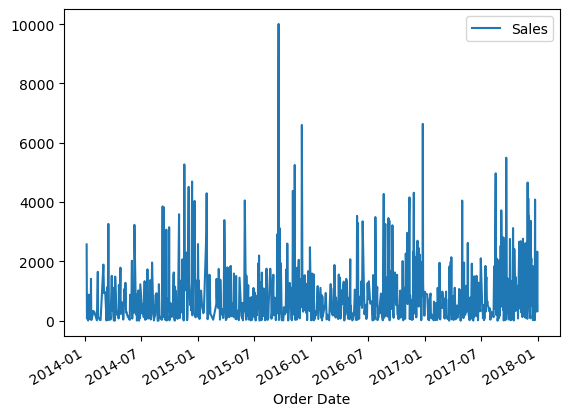

In [88]:
furniture.plot()
plt.show()

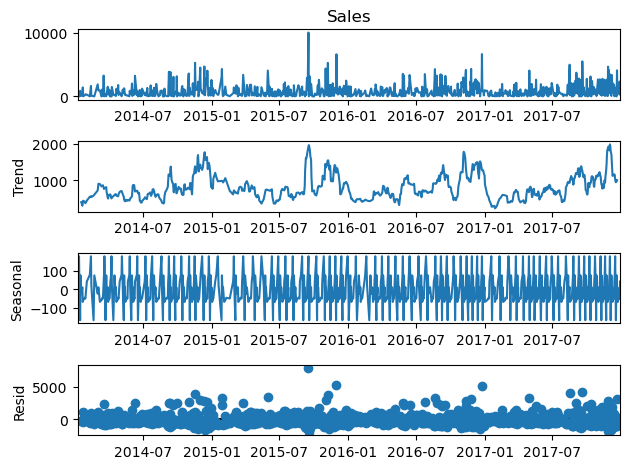

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompostion = seasonal_decompose(furniture['Sales'], period=12)
decompostion.plot()
plt.show()

In [90]:
y = furniture['Sales'].resample('MS').mean()

In [91]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [92]:
# y['2015']

In [93]:
# y['2016']

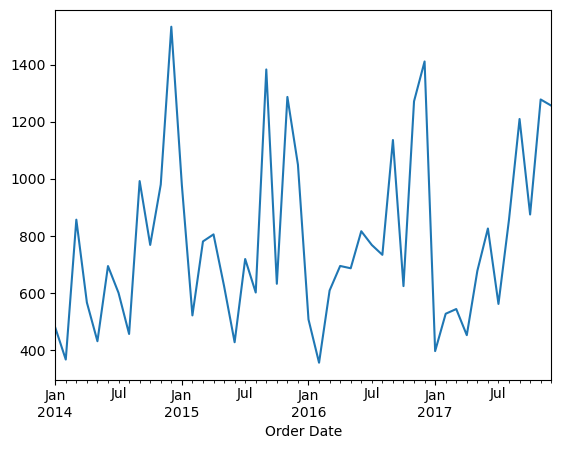

In [94]:
y.plot()
plt.show()

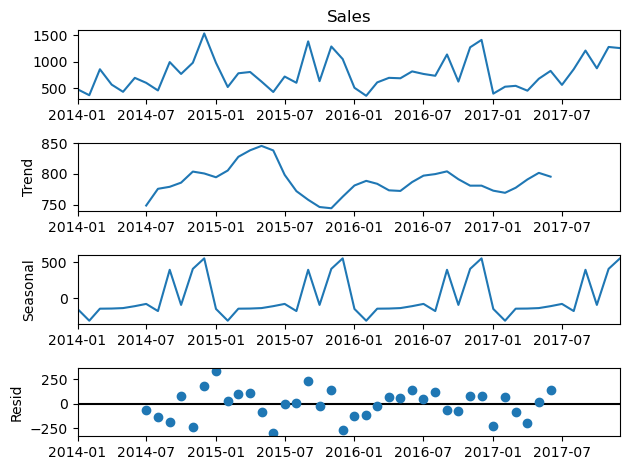

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompostion = seasonal_decompose(y, model='additive')
decompostion.plot()
plt.show()

In [96]:
# to check whether my data is stationary or non-stationary
# chechk name - "Augmented Dickey Fuller Test" - this is mandatory steps in ML model
    
from statsmodels.tsa.stattools import adfuller

In [97]:
adfuller(y)

(-5.191070187339276,
 9.168756655665362e-06,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 521.9616303121272)

In [98]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print('Augmented Dickey Fuller Test - Stationary or Non-Staionary')
    labels = ['ADF Test Statistics' , 'p-value' , '#Lags' , 'No of Obs']
    
    for a , b in zip(result, labels):
        print(b + " : "+ str(a))
        
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my timeseries is stationary")
    else:
        print("Week evidence against null hypothesis and my timeseries in Non-Stationary")

In [99]:
adf_check(y)

Augmented Dickey Fuller Test - Stationary or Non-Staionary
ADF Test Statistics : -5.191070187339276
p-value : 9.168756655665362e-06
#Lags : 10
No of Obs : 37
Strong evidence against null hypothesis and my timeseries is stationary


In [100]:
# d = 0

In [101]:
furniture['Seasonality'] = furniture['Sales'] - furniture['Sales'].shift(12)

In [102]:
furniture.head(20)

,Sales,Seasonality
Order Date,,
2014-01-06,2573.820,NaN
2014-01-07,76.728,NaN
2014-01-10,51.940,NaN
2014-01-11,9.940,NaN
2014-01-13,879.939,NaN
2014-01-14,61.960,NaN
2014-01-16,127.104,NaN
2014-01-19,181.470,NaN
2014-01-20,1413.510,NaN


In [103]:
adf_check(furniture['Seasonality'].dropna())

Augmented Dickey Fuller Test - Stationary or Non-Staionary
ADF Test Statistics : -13.836757076990276
p-value : 7.418720599858066e-26
#Lags : 11
No of Obs : 865
Strong evidence against null hypothesis and my timeseries is stationary


In [104]:
# for seasonality D = 1 and for Trend d = 0

In [105]:
# To find P/p and Q/q vqlue

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

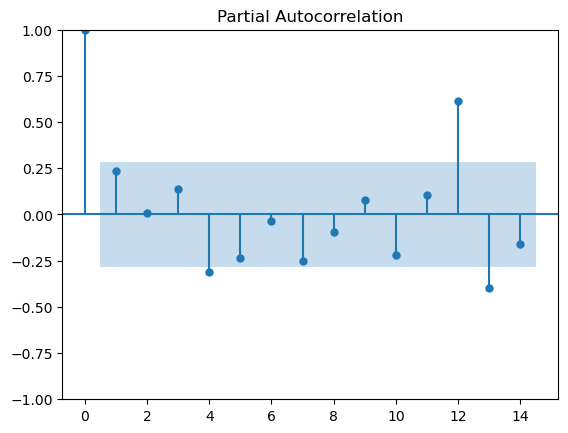

In [106]:
# Trend : d=2, p = ? and q=?
# to find p value
plot_pacf(y, lags= 14)
plt.show()

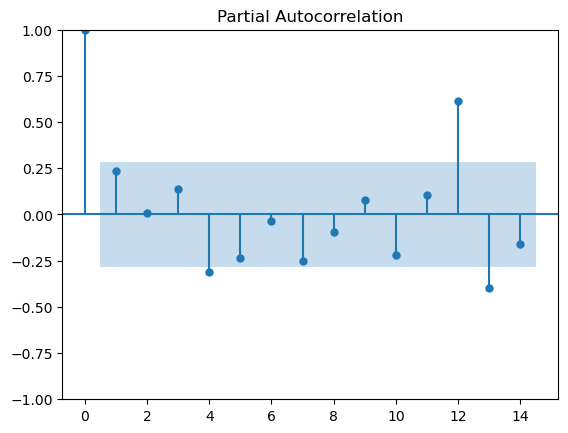

In [107]:
# to find q value
plot_pacf(y, lags= 14)
plt.show()

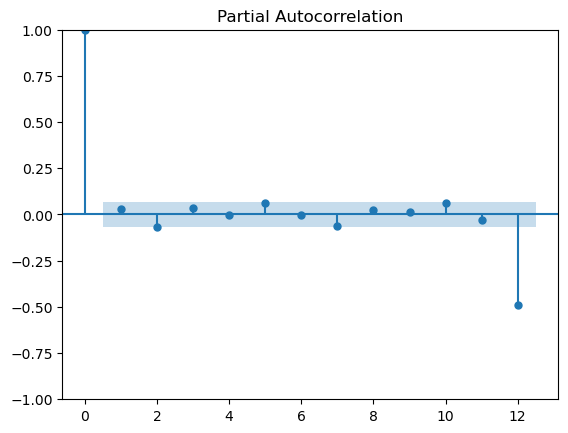

In [108]:
# FOr Seasonality 
# to find P value
plot_pacf(furniture['Seasonality'].dropna(), lags= 12)
plt.show()

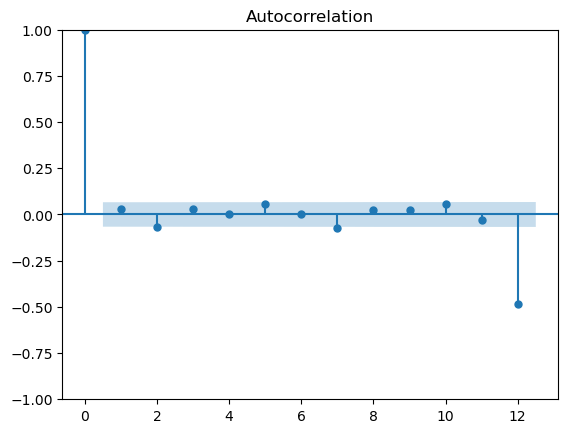

In [109]:
# to find Q value
plot_acf(furniture['Seasonality'].dropna(), lags= 12)
plt.show()

#### p = 0 , d = 0 , q = 0   for trend
#### P = 0, D = 1 , Q = 0   for Seasonality

In [110]:
# Building time series forecasting

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [111]:
 model = sm.tsa.statespace.SARIMAX(y, 
                                  order = (0,0,0), seasonal_order=(0,1,0,12))

In [112]:
result = model.fit()

In [113]:
print(result.summary())


                                SARIMAX Results                                 
Dep. Variable:                    Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -246.685
Date:                  Wed, 20 Dec 2023   AIC                            495.371
Time:                          12:32:59   BIC                            496.954
Sample:                      01-01-2014   HQIC                           495.924
                           - 12-01-2017                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.234e+04   1.35e+04      3.890      0.000     2.6e+04    7.87e+04
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.17
Prob(Q):                       

In [114]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [115]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1374.294256061431
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:477.71701309212006
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:302.2702899793683
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:977.4114391755996
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:318.00471991163414
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:304.2488280302707
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:720.9252270758096
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2688.8045397577957
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:466.5607429809157
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:291.6261389673276
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:499.573399692085
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2440.0997862338
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:319.9884876946868
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:291.872557643564
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:677.8947668414504
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1197.8112674437089
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:486.6378567

In [116]:
# Training the ARIMA model.
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -136.683
Date:                            Wed, 20 Dec 2023   AIC                            283.366
Time:                                    12:33:15   BIC                            288.589
Sample:                                01-01-2014   HQIC                           284.500
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0949      0.313     -0.303      0.762      -0.708       0.518
ma.L1         -1.0000      0.415   

##### We got the lowest AIC value: 283.366 for ARIMA(1, 1, 1)x(1, 1, 1, 12). We shall use these best params in our model.

In [117]:
len(y)

48

In [119]:
# results.plot_diagnostics(figsize=(15, 8))
# plt.show()

In [120]:
y.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049188
Freq: MS, Name: Sales, dtype: float64

            lower Sales  upper Sales
Order Date                          
2017-01-01   333.978884   970.418366
2017-02-01   118.579013   754.746307
2017-03-01   365.236233  1000.282600
2017-04-01   423.616357  1057.669651
2017-05-01   364.913234   998.077873
2017-06-01   407.630368  1039.995287
2017-07-01   427.759226  1059.400702
2017-08-01   385.542609  1016.526557
2017-09-01   853.974512  1484.358280
2017-10-01   330.789457   960.623255
2017-11-01   932.266603  1561.594582
2017-12-01  1044.330522  1673.192627


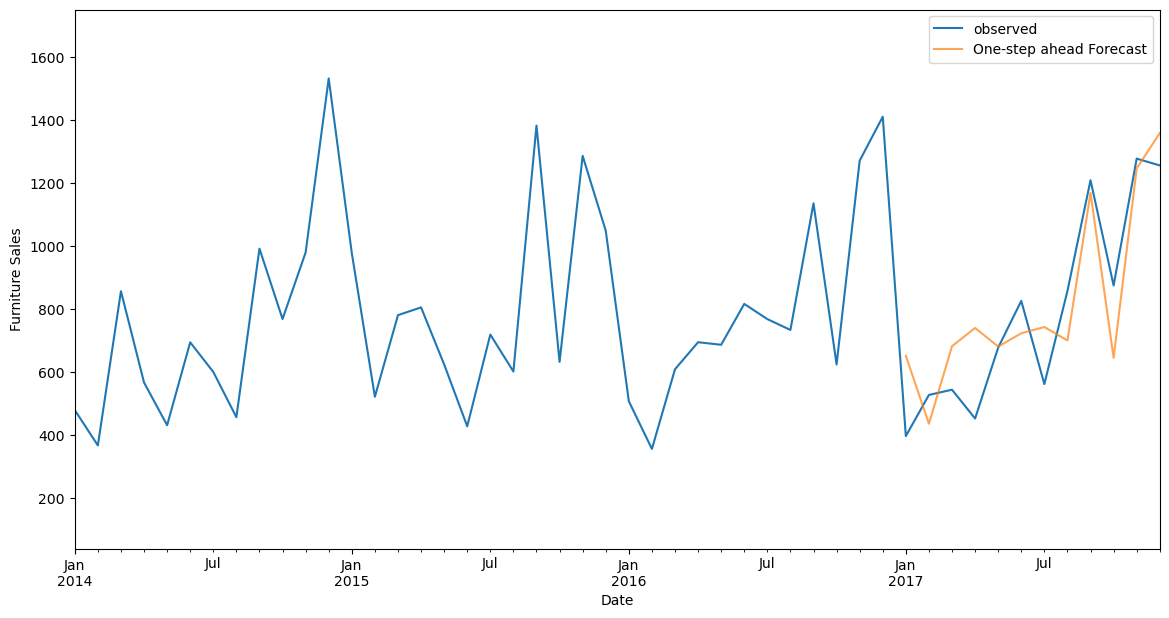

In [125]:
# validate whether my model is right or wrong

pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [126]:
y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))

Mean Square Error is: 25715.0806


In [127]:
print('Root Mean Square Error is:', np.sqrt(mse))

Root Mean Square Error is: 160.35922364513286


# Future Forecasts

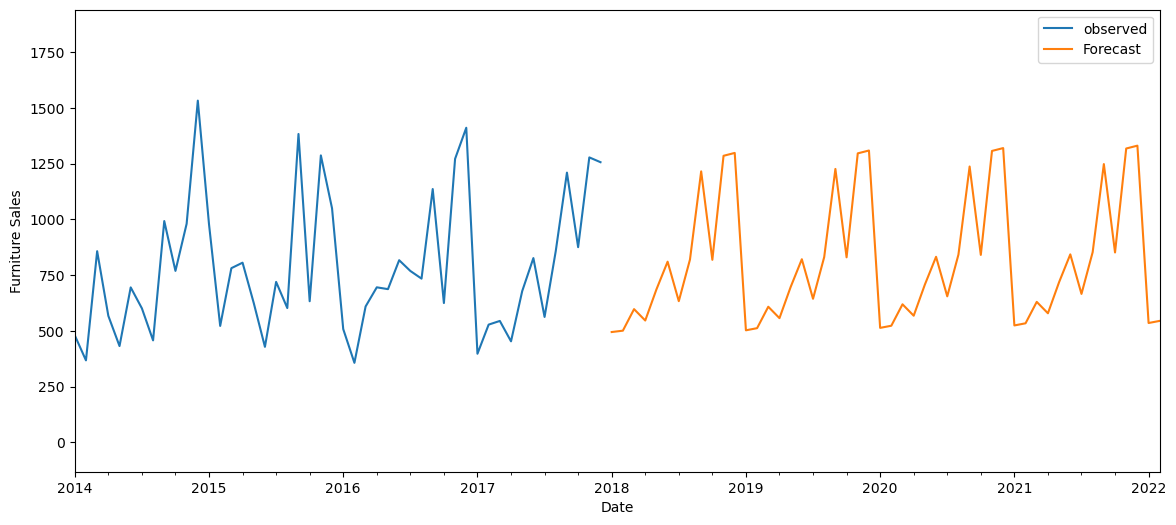

In [144]:
# Forecasting the future (out of sample) values.
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()